In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
%matplotlib notebook

import starfish
from starfish.types import Indices
from showit import image

In [3]:
experiment = starfish.Experiment.from_json(
    'https://dmf0bdeheu4zf.cloudfront.net/20180813/DARTFISH/fov_001/experiment.json'
)

  0%|          | 0/18 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/slicedimage/backends/_caching.py:37: UserWarning: Checksum of tile data does not match the manifest checksum!  Not writing to cache
  "Checksum of tile data does not match the manifest checksum!  Not "
100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


In [4]:
projection = experiment.image.max_proj(Indices.CH, Indices.ROUND, Indices.Z)

In [7]:
nuclei_projection = experiment.auxiliary_images['nuclei'].max_proj(Indices.CH, Indices.ROUND, Indices.Z)

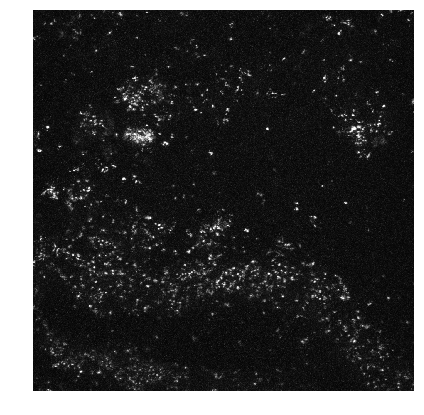

In [5]:
image(projection)

In [19]:
experiment.image.shape

OrderedDict([(<Indices.ROUND: 'r'>, 6),
             (<Indices.CH: 'c'>, 3),
             (<Indices.Z: 'z'>, 1),
             ('y', 988),
             ('x', 988)])

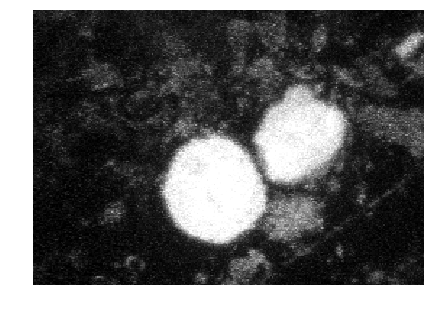

In [25]:
image(nuclei_projection[220:410, 700:970])

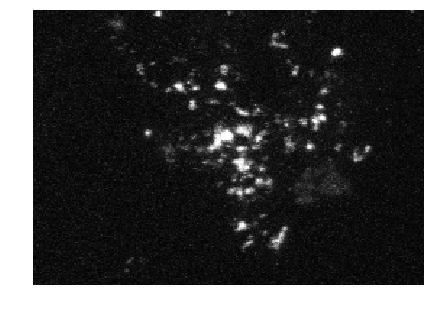

In [26]:
image(projection[220:410, 700:970])

In [27]:
test_data = experiment.image._data[:, :, :, 220:410, 700:970]
test_stack = starfish.ImageStack.from_numpy_array(test_data)

nuclei_stack = experiment.auxiliary_images['nuclei']._data[:, :, :, 220:410, 700:970]
test_nuclei_stack = starfish.ImageStack.from_numpy_array(nuclei_stack)

100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]


In [30]:
import json

def update_version_to_1_0_0(json_file: str):
    with open(json_file, 'rb') as frd:
        data = json.load(frd)
    data['version'] = '1.0.0'
    print(data)
    with open(json_file, 'w') as fwd:
        data = json.dump(data, fwd)

In [32]:
!mkdir -p /Users/ambrosecarr/Desktop/DARTFISH_TEST/fov_001

In [34]:
dartfish_test_stack = '/Users/ambrosecarr/Desktop/DARTFISH_TEST/fov_001/hybridization.json'
test_stack.write(dartfish_test_stack)

In [42]:
nuclei_test_stack = '/Users/ambrosecarr/Desktop/DARTFISH_TEST/fov_001/nuclei.json'
test_nuclei_stack.write(nuclei_test_stack)

In [36]:
def create_experiment_json(new_directory, original_experiment, original_codebook):
    shutil.copy(original_experiment, new_directory)
    shutil.copy(original_codebook, new_directory)

In [37]:
create_experiment_json(
    os.path.split(merfish_test_stack)[0], 
    '/Users/ambrosecarr/Desktop/DARTFISH/fov_001/experiment.json',
    '/Users/ambrosecarr/Desktop/DARTFISH/fov_001/codebook.json'
)

In [40]:
test_experiment = starfish.Experiment.from_json('/Users/ambrosecarr/Desktop/DARTFISH_TEST/fov_001/experiment.json')

100%|██████████| 18/18 [00:00<00:00, 969.26it/s]


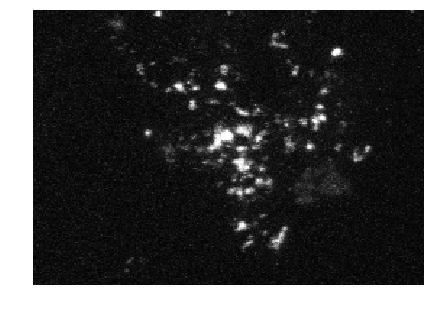

In [41]:
image(test_experiment.image.max_proj(Indices.CH, Indices.ROUND, Indices.Z))